<a href="https://colab.research.google.com/github/herdiadam/CNN-Image-Classification-Case-Study/blob/main/CNN_Case_Study_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Dataset MNIST**

Epoch [1/5], Step [100/600], Loss: 0.1616
Epoch [1/5], Step [200/600], Loss: 0.0861
Epoch [1/5], Step [300/600], Loss: 0.0661
Epoch [1/5], Step [400/600], Loss: 0.0449
Epoch [1/5], Step [500/600], Loss: 0.1291
Epoch [1/5], Step [600/600], Loss: 0.0675
Epoch [2/5], Step [100/600], Loss: 0.0644
Epoch [2/5], Step [200/600], Loss: 0.0682
Epoch [2/5], Step [300/600], Loss: 0.1006
Epoch [2/5], Step [400/600], Loss: 0.0567
Epoch [2/5], Step [500/600], Loss: 0.1056
Epoch [2/5], Step [600/600], Loss: 0.0359
Epoch [3/5], Step [100/600], Loss: 0.0073
Epoch [3/5], Step [200/600], Loss: 0.0296
Epoch [3/5], Step [300/600], Loss: 0.0328
Epoch [3/5], Step [400/600], Loss: 0.0110
Epoch [3/5], Step [500/600], Loss: 0.0313
Epoch [3/5], Step [600/600], Loss: 0.0980
Epoch [4/5], Step [100/600], Loss: 0.0021
Epoch [4/5], Step [200/600], Loss: 0.0233
Epoch [4/5], Step [300/600], Loss: 0.0231
Epoch [4/5], Step [400/600], Loss: 0.0057
Epoch [4/5], Step [500/600], Loss: 0.0305
Epoch [4/5], Step [600/600], Loss:

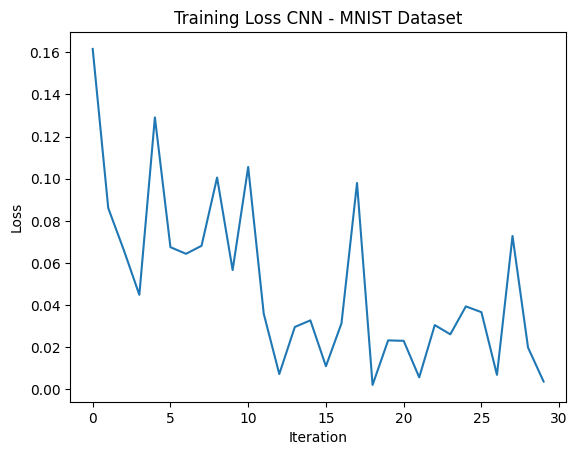

Test Accuracy of the model on the 10000 test images: 99.09 %


In [5]:
# Import libraries
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Device configuration
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Hyper parameters
num_epochs = 5
num_classes = 10
batch_size = 100
learning_rate = 0.001

# MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='./data',
                                           train=True,
                                           transform=transforms.ToTensor(),
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='./data',
                                          train=False,
                                          transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

# Convolutional neural network (two convolutional layers)
class ConvNet(nn.Module):
    def __init__(self, num_classes=10):
        super(ConvNet, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.fc = nn.Linear(7*7*32, num_classes)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc(out)
        return out

# Initialize and move model to GPU
model = ConvNet(num_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Train the model
total_step = len(train_loader)
loss_list = []  # List to store loss for plotting
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            loss_list.append(loss.item())  # Append the current loss
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

# Plot the loss
plt.plot(loss_list)
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Training Loss CNN - MNIST Dataset")
plt.show()

# Test the model
model.eval()  # eval mode
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Test Accuracy of the model on the 10000 test images: {} %'.format(100 * correct / total))

# Save the model checkpoint
torch.save(model.state_dict(), 'mnist_model.ckpt')

**Dataset CIFAR-10**

Files already downloaded and verified
Epoch [1/5], Step [100/500], Loss: 1.5158
Epoch [1/5], Step [200/500], Loss: 1.4230
Epoch [1/5], Step [300/500], Loss: 1.5625
Epoch [1/5], Step [400/500], Loss: 1.7224
Epoch [1/5], Step [500/500], Loss: 1.1595
Epoch [2/5], Step [100/500], Loss: 1.6096
Epoch [2/5], Step [200/500], Loss: 1.3641
Epoch [2/5], Step [300/500], Loss: 1.3356
Epoch [2/5], Step [400/500], Loss: 0.9788
Epoch [2/5], Step [500/500], Loss: 1.3168
Epoch [3/5], Step [100/500], Loss: 1.0844
Epoch [3/5], Step [200/500], Loss: 1.2940
Epoch [3/5], Step [300/500], Loss: 1.0661
Epoch [3/5], Step [400/500], Loss: 1.0611
Epoch [3/5], Step [500/500], Loss: 1.4156
Epoch [4/5], Step [100/500], Loss: 0.9856
Epoch [4/5], Step [200/500], Loss: 1.1759
Epoch [4/5], Step [300/500], Loss: 0.8796
Epoch [4/5], Step [400/500], Loss: 1.1763
Epoch [4/5], Step [500/500], Loss: 1.0555
Epoch [5/5], Step [100/500], Loss: 0.8540
Epoch [5/5], Step [200/500], Loss: 0.7596
Epoch [5/5], Step [300/500], Loss: 1.2

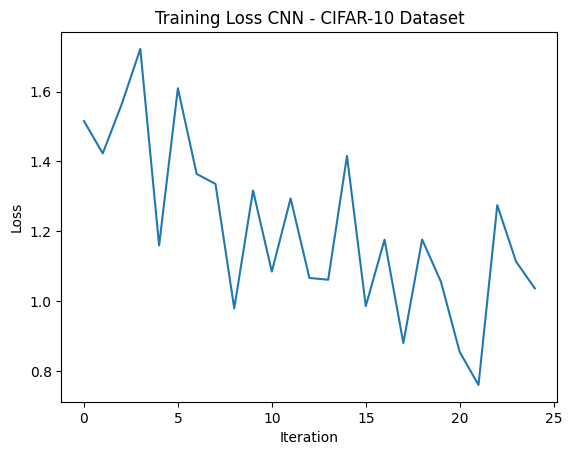

Test Accuracy of the model on the 10000 test images: 71.03 %


In [6]:
# Import libraries
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Device configuration
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Hyper parameters
num_epochs = 5
num_classes = 10
batch_size = 100
learning_rate = 0.001

# CIFAR-10 dataset
transform = transforms.Compose([
    transforms.Pad(4),
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32),
    transforms.ToTensor()])

train_dataset = torchvision.datasets.CIFAR10(root='./data',
                                             train=True,
                                             transform=transform,
                                             download=True)

test_dataset = torchvision.datasets.CIFAR10(root='./data',
                                            train=False,
                                            transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

# Convolutional neural network (two convolutional layers)
class ConvNet(nn.Module):
    def __init__(self, num_classes=10):
        super(ConvNet, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.fc = nn.Linear(8*8*64, num_classes)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(out.size(0), -1)
        out = self.fc(out)
        return out

# Initialize and move model to GPU
model = ConvNet(num_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Train the model
total_step = len(train_loader)
loss_list = []  # List to store loss for plotting
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            loss_list.append(loss.item())  # Append the current loss
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                  .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

# Plot the loss
plt.plot(loss_list)
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Training Loss CNN - CIFAR-10 Dataset")
plt.show()

# Test the model
model.eval()  # eval mode
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Test Accuracy of the model on the 10000 test images: {} %'.format(100 * correct / total))

# Save the model checkpoint
torch.save(model.state_dict(), 'cifar10_model.ckpt')